## IMPORTING PACKAGES

In [1]:
# Importing packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import pylab
import stemgraphic
from IPython.display import Markdown

## FUNCTIONS

In [2]:
# Getting student_number
def getting_student_number():
    
    while(True):
        try:
            student_number = int(input("Student Number: "))
            break
        except:
            print("The Student Number must be integer")
            continue
    return student_number


# Reading excel files
def reading_excel_files(file_name,student_number):
    
    student_data = pd.read_excel(file_name,sheet_name=1)
    all_data = pd.read_excel(file_name,sheet_name=0)
    student = student_data[student_data["Student Number"] == student_number]
    student_name =[str(x) for x in student.iloc[0,:]][2]
    my_data = all_data.loc[:,["V"+str(int(student["Order"]))]]
    return student_name,my_data
    #class_number = 6
    
def create_frequency_table(my_data,class_number,max_value,min_value):
    
    class_range = float((max_value-min_value+0.1)/class_number)
    dict = {"class_number":[i for i in range(1,class_number+1)],
            "lower limit":[float("{:.2f}".format(i)) for i in np.arange(min_value,max_value,class_range)],
            "upper limit":[float("{:.2f}".format(i)) for i in np.arange(min_value+class_range-0.1,max_value+class_range,class_range)]
           }
    frequency_table = pd.DataFrame(dict)
    frequency_table["class_mean"] = [ (row[1]+row[0])/2 for row in frequency_table[["lower limit","upper limit"]].values]
    frequency = [0 for i in range(6)]
    for row in my_data.values:
        if(math.ceil(float((row-min_value)/(class_range-0.1)))-1==class_number):
            frequency[math.ceil(float((row-min_value)/(class_range-0.1)))-2 ] += 1
        else:
            if row-min_value == 0:
                frequency[0] += 1
            else:
                frequency[math.ceil(float((row-min_value)/(class_range-0.1)))-1] += 1
    frequency_table["frequency"] = frequency
    print(frequency_table)
    return frequency_table

    
# MARKDOWNSS ***********************************
# Data Decription   


# Introduction Markdown
def introduction_markdown(student_number,student_name):
    
    markdown_tuple = Markdown("# INTRODUCTION"),Markdown("""
    * Student name : {student_name}
    * Student number : {student_number}
    * This notebook is for Statistic Homework is done by using Python libraries
    """.format(student_name=student_name, student_number=student_number))
    display_markdown(markdown_tuple)

def frequency_table_markdown(my_data,class_number):
    
    min_value = float(my_data.min())
    max_value = float(my_data.max())
    markdown_tuple = Markdown("# FREQUENCY TABLE CREATING"),Markdown("""
    * Maximum value : {}
    * Minimum value : {}
    * Range         : {} - {} = {}
    * Class range   : (range+0.1)/class_number) = ({}+0.1)/{} = {}
    """.format(max_value,min_value,max_value,min_value,max_value-min_value,max_value-min_value,class_number,(max_value-min_value+0.1)/class_number))
    display_markdown(markdown_tuple)
    return create_frequency_table(my_data,class_number,max_value,min_value)
  
def display_markdown(name):
    for i in name:
        display(i)

In [11]:
def create_boxplot_markdown(my_data):
    
    boxplot = Markdown("### Boxplot")
    quantiles = my_data.iloc[:,0].quantile([0.25,0.5,0.75])
    
    if  (quantiles.values[1] - quantiles.values[0]) > (quantiles.values[2]-quantiles.values[1]):
        explanation = Markdown("Seeing below graph , can be said range between Q2 and Q1 is more range between Q3 and Q2 , so again we can say left skewed data.")
    elif (quantiles.values[1] - quantiles.values[0]) < (quantiles.values[2]-quantiles.values[1]):
        explanation = Markdown("Seeing below graph , can be said range between Q2 and Q1 is less range between Q3 and Q2 , so again we can say left skewed data.")
    else:
        explanation = Markdown("Seeing below graph , can be said range between Q2 and Q1 is equal range between Q3 and Q2 , so again we can say normal data.")

    return boxplot,explanation

def create_boxplot(my_data):
    
    graph_title = Markdown("# GRAPHS OF DATA")
    boxplot , boxplot_explanation = create_boxplot_markdown(my_data)
    markdown_tuple = graph_title,boxplot,boxplot_explanation
    
    display_markdown(markdown_tuple)
    
    # Boxplot drawing
    plt.figure(figsize=(7,7))
    my_data.boxplot()
    plt.show() 
    
def create_scatter(frequency_table):
    
    frequency_title = Markdown("## Plot of Frequency Table ( Scatter - Histogram )")
    scatter = Markdown("### Scatter Plot")
    markdown_tuple = frequency_title,scatter
    display_markdown(markdown_tuple)
    
    # Scatter drawing
    a = ""
    for i in [str(int(row[0]))+"-->"+str(row[1])+"-"+str(row[2])+"\n" for row in frequency_table.values]:
        a += i
    plt.figure(figsize=(7,7))
    plt.scatter(frequency_table.loc[:,"class_number"],frequency_table.loc[:,"frequency"],color="red",label=a )
    plt.legend()
    plt.xlabel("class_number")
    plt.ylabel("frequency")
    plt.title("Relationship between name and age")
    plt.grid(True)
    plt.show()
    
def create_steam_leaf(my_data):

    steam_leaf = Markdown("### Steam-leaf Plot")
    markdown_tuple = steam_leaf,
    display_markdown(markdown_tuple)
    
    stems = [ int(row/10) for row in my_data[my_data.columns[0]].values]
    plt.figure(figsize=(7,7))
    pylab.xlim([0,3])
    pylab.ylim([0,30])
    plt.title('Stem Plot(Stem and Leaf Plot)')
    plt.xlabel('Range/Stems')
    plt.ylabel('Marks obtained/Leafs')
    plt.stem(stems, my_data[my_data.columns[0]],use_line_collection=True)
    plt.grid(True)
    plt.show()
    
    stemgraphic.stem_graphic(my_data[my_data.columns[0]], scale = 10)

def create_histogram(my_data,frequency_table):
    
    steam_leaf = Markdown("### Histogram Plot")
    markdown_tuple = steam_leaf,
    display_markdown(markdown_tuple)
    
    plt.figure(figsize=(7,7))
    plt.hist(my_data.iloc[:,0] ,facecolor='g', alpha=0.75)
    plt.xlabel("class_number")
    plt.ylabel("frequency")
    plt.title("histogram")
    plt.grid(True)
    plt.show()
    
    
def graphs_of_data_markdown(my_data,frequency_table):
    
    create_boxplot(my_data)
    #create_scatter(frequency_table)
    create_histogram(my_data,frequency_table)
    create_steam_leaf(my_data)

In [12]:
def data_description_markdown(my_data):
    
    markdown_tuple = Markdown("# DATA DESCRIPTION"),Markdown("""
    {}
    * MODE OF DATA : 
    {} \n
    * SKEWNESS COEFFICIENT OF DATA : 
    {} 
    * KURTOSIS COEFFICIENT OF DATA : 
    {} \n\n
    """.format(my_data.describe(),
               my_data.mode(),
               my_data.skew(axis = 0, skipna = True),
               my_data.kurt(axis=0)
              ))
    display_markdown(markdown_tuple)
    data_description_markdown_2(my_data)
    
def data_description_markdown_2(my_data):
    
    mode = my_data.mode()[my_data.columns[0]].values[0]
    mean = my_data.mean()[my_data.columns[0]]
    max_val = my_data.max()[my_data.columns[0]]
    min_val = my_data.min()[my_data.columns[0]]
    range_val = max_val - min_val
    first_quartile = my_data.iloc[:,0].quantile([0.25,0.5,0.75]).values[0]
    second_quartile = my_data.iloc[:,0].quantile([0.25,0.5,0.75]).values[1]
    third_quartile = my_data.iloc[:,0].quantile([0.25,0.5,0.75]).values[2]
    interquartile_range = float("{:.2f}".format(third_quartile-first_quartile))
    kurtosis_coefficient =float("{:.2f}".format(my_data.kurt(axis=0).values[0])) 
    
    if mean < mode :
        skewness_md = Markdown("* Mean < mode also skewness coefficient is negative so this dataset left-skewed and negatively skewed.")
    elif mean > mode : 
        skewness_md = Markdown("* Mean > mode also skewness coefficient is positive so this dataset right-skewed and positively skewed.")
    else:
        skewness_md = Markdown("* Mean < mode also skewness coefficient is negative so this dataset normal skewed.")
    
    max_min_range_md = Markdown("* Max value = {} , min value = {} so range most of values = {}".format(max_val,min_val,range_val))
    fq_md = Markdown("* First quartile = {} , it is mean 25% of data less than {}".format(first_quartile,first_quartile))
    sd_md = Markdown("* Second quartile = {} also equal median , it is mean 50% of data less than {}".format(second_quartile,second_quartile))
    td_md = Markdown("* Third quartile = {} , it is mean 75% of data less than {}".format(third_quartile,third_quartile))
    iq_md = Markdown("* Interquartile range = Q3-Q1 = {}-{} = {}".format(third_quartile,first_quartile,interquartile_range))
    
    if kurtosis_coefficient < 0:
        kurtosis_md = Markdown("* Kurtosis coefficient less than zero so this dataset is PLATYKURTIC that flat and spread out")
    elif kurtosis_coefficient > 0:
        kurtosis_md = Markdown("* Kurtosis coefficient more than zero so this dataset is LEPTOKURTIC that high and thin")
    else:
        kurtosis_md = Markdown("* Kurtosis coefficient equal so this dataset is MESOKURTIC that normal shape")
        
    markdown_tuple = skewness_md,max_min_range_md,fq_md,sd_md,td_md,iq_md,kurtosis_md
    display_markdown(markdown_tuple)

Student Number: 21627428


# INTRODUCTION


    * Student name : MUHAMMED SAİD KAYA
    * Student number : 21627428
    * This notebook is for Statistic Homework is done by using Python libraries
    

# DATA DESCRIPTION


            21627428
count  50.000000
mean   20.258000
std     5.626725
min     7.900000
25%    16.175000
50%    20.400000
75%    23.600000
max    30.500000
    * MODE OF DATA : 
       21627428
0      17.7 

    * SKEWNESS COEFFICIENT OF DATA : 
    21627428   -0.028252
dtype: float64 
    * KURTOSIS COEFFICIENT OF DATA : 
    21627428   -0.528056
dtype: float64 


    

* Mean > mode also skewness coefficient is positive so this dataset right-skewed and positively skewed.

* Max value = 30.5 , min value = 7.9 so range most of values = 22.6

* First quartile = 16.175 , it is mean 25% of data less than 16.175

* Second quartile = 20.4 also equal median , it is mean 50% of data less than 20.4

* Third quartile = 23.6 , it is mean 75% of data less than 23.6

* Interquartile range = Q3-Q1 = 23.6-16.175 = 7.43

* Kurtosis coefficient less than zero so this dataset is PLATYKURTIC that flat and spread out

# FREQUENCY TABLE CREATING


    * Maximum value : 30.5
    * Minimum value : 7.9
    * Range         : 30.5 - 7.9 = 22.6
    * Class range   : (range+0.1)/class_number) = (22.6+0.1)/6 = 3.7833333333333337
    

   class_number  lower limit  upper limit  class_mean  frequency
0             1         7.90        11.58       9.740          3
1             2        11.68        15.37      13.525          7
2             3        15.47        19.15      17.310         12
3             4        19.25        22.93      21.090         10
4             5        23.03        26.72      24.875          9
5             6        26.82        30.50      28.660          9


# GRAPHS OF DATA

### Boxplot

Seeing below graph , can be said range between Q2 and Q1 is more range between Q3 and Q2 , so again we can say left skewed data.

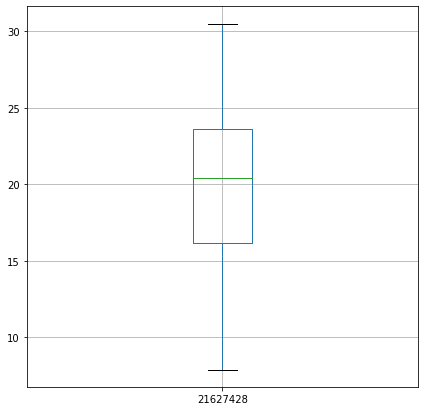

### Histogram Plot

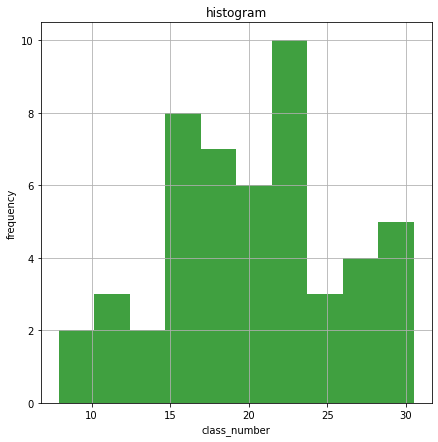

### Steam-leaf Plot

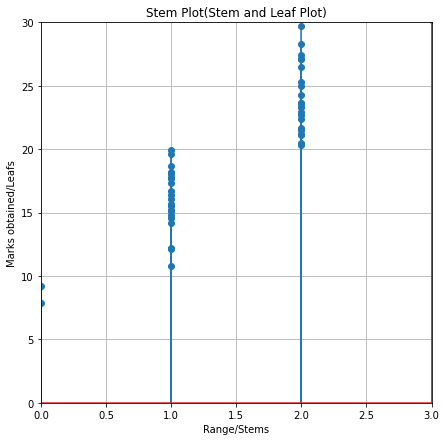

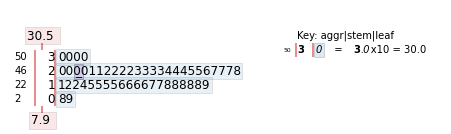

In [17]:
student_number = getting_student_number()
student_name , my_data = reading_excel_files("data.xlsx",student_number)
my_data.columns = [student_number]

introduction_markdown(student_number,student_name)
data_description_markdown(my_data)
frequency_table = frequency_table_markdown(my_data,6)
graphs_of_data_markdown(my_data,frequency_table)
